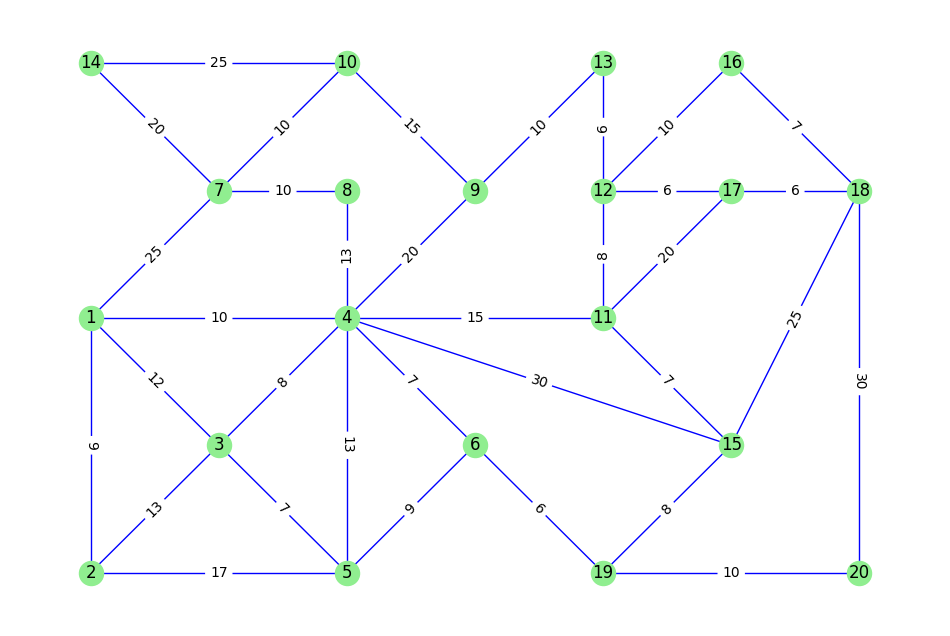

In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
test_graph = pd.read_csv("C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/csv/Thuyhe_HCM_motphan_test_graph.csv")

diem_ven = pd.read_csv("C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/csv/Thuyhe_Diemven2.csv")

# Khởi tạo đồ thị vô hướng
G = nx.Graph()

# Thêm các đỉnh vào đồ thị từ dataframe diem_ven
for index, row in diem_ven.iterrows():
    G.add_node(row['Id'], XX=row['XX'], YY=row['YY'])

# Thêm các cạnh vào đồ thị từ dataframe test_graph
for index, row in test_graph.iterrows():
    from_point = row['FromPoint']
    to_point = row['ToPoint']
    G.add_edge(from_point, to_point, chieudai=row['chieudai'])

# Vẽ đồ thị mà không có đường viền lớn của khung hình
fig, ax = plt.subplots(figsize=(12, 8))  # Đặt kích thước hình vẽ
ax.set_axis_off()  # Tắt trục tọa độ

# Vẽ các node với màu nền xanh
node_color = 'lightgreen'
pos = {node: (data['XX'], data['YY']) for node, data in G.nodes(data=True)}
nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_color)

# Vẽ các cạnh của đồ thị
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='blue')

# Hiển thị số liệu của thuộc tính 'chieudai' trên các đường nối
edge_labels = nx.get_edge_attributes(G, 'chieudai')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Hiển thị label của các node là id của chúng
node_labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# plt.title('Đồ thị vô hướng 20 điểm')  # Đặt tiêu đề cho đồ thị
plt.show()

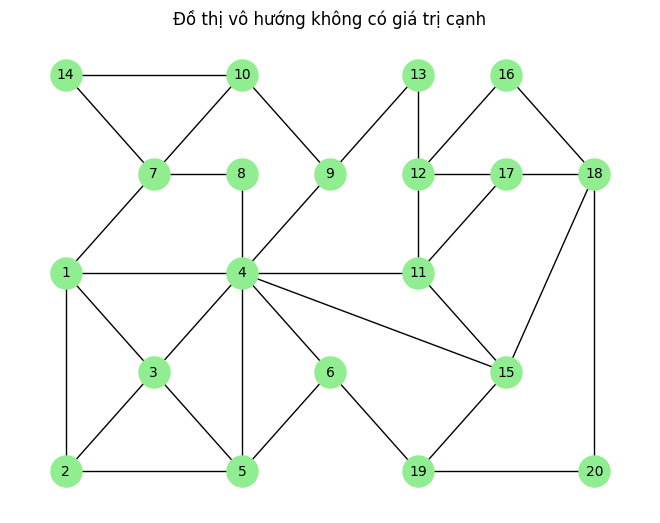

In [23]:
import pandas as pd
import networkx as nx

# Đọc dữ liệu từ file CSV
test_graph = pd.read_csv("C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/csv/Thuyhe_HCM_motphan_test_graph.csv")

diem_ven = pd.read_csv("C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/csv/Thuyhe_Diemven2.csv")

# Tạo đồ thị vô hướng từ dataframe
G = nx.Graph()

# Thêm các đỉnh vào đồ thị từ dataframe "diem_ven"
for index, row in diem_ven.iterrows():
    G.add_node(row['Id'], XX=row['XX'], YY=row['YY'])

# Thêm các cạnh vào đồ thị từ dataframe "test_graph"
for index, row in test_graph.iterrows():
    G.add_edge(row['FromPoint'], row['ToPoint'], chieudai=row['chieudai'])

# # Kiểm tra đồ thị đã được tạo đúng chưa
# print("Nodes of graph:", G.nodes())
# print("Edges of graph:", G.edges())

# Nếu cần vẽ đồ thị
import matplotlib.pyplot as plt

pos = {node: (data['XX'], data['YY']) for node, data in G.nodes(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10, font_color='black')
plt.title('Đồ thị vô hướng không có giá trị cạnh')
plt.show()


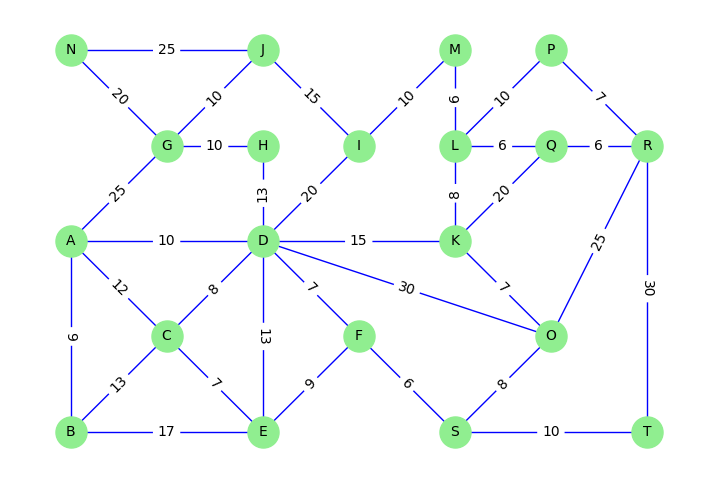

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Đọc dữ liệu từ dataframe test_graph
file_path_graph = 'C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/csv/Thuyhe_HCM_motphan_test_graph.csv'
test_graph = pd.read_csv(file_path_graph)

# Đọc dữ liệu từ dataframe diem_ven
file_path_ven = 'C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/csv/Thuyhe_Diemven2.csv'
diem_ven = pd.read_csv(file_path_ven)

# Tạo ánh xạ từ số sang chữ cái
node_mapping = {i: chr(64 + i) for i in range(1, 27)}

# Khởi tạo đồ thị vô hướng
G = nx.Graph()

# Thêm các đỉnh vào đồ thị từ dataframe diem_ven với ánh xạ
for index, row in diem_ven.iterrows():
    node_id = node_mapping.get(row['Id'], row['Id'])
    G.add_node(node_id, XX=row['XX'], YY=row['YY'])

# Thêm các cạnh vào đồ thị từ dataframe test_graph với ánh xạ
for index, row in test_graph.iterrows():
    from_point = node_mapping.get(row['FromPoint'], row['FromPoint'])
    to_point = node_mapping.get(row['ToPoint'], row['ToPoint'])
    G.add_edge(from_point, to_point, chieudai=row['chieudai'])

# Kiểm tra đồ thị đã được tạo thành công
# print("Nodes of graph:", G.nodes())
# print("Edges of graph:", G.edges())

# Vẽ đồ thị mà không có đường viền lớn của khung hình
fig, ax = plt.subplots(figsize=(9, 6))  # Đặt kích thước hình vẽ
ax.set_axis_off()  # Tắt trục tọa độ

# Vẽ các cạnh của đồ thị
pos = {node: (data['XX'], data['YY']) for node, data in G.nodes(data=True)}
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='blue')

# Vẽ các node với hình tròn và nền xanh
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_shape='o', node_size=500)

# Vẽ các nhãn của node
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10)

# Hiển thị số liệu của thuộc tính 'chieudai' trên các đường nối
edge_labels = nx.get_edge_attributes(G, 'chieudai')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Tiêu đề đồ thị
# plt.title('Đồ thị vô hướng có node chữ cái')

# Hiển thị đồ thị
plt.show()

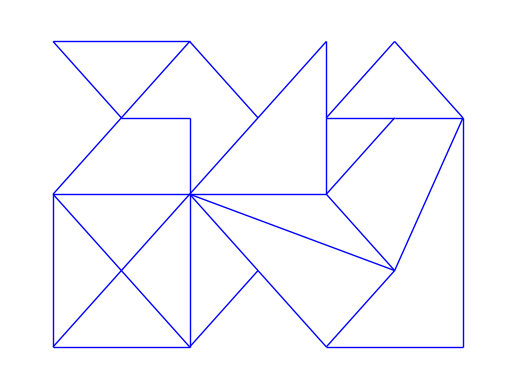

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
test_graph = pd.read_csv("C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/csv/Thuyhe_HCM_motphan_test_graph.csv")

diem_ven = pd.read_csv("C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/csv/Thuyhe_Diemven2.csv")

# Khởi tạo đồ thị vô hướng
G = nx.Graph()

# Thêm các đỉnh vào đồ thị từ dataframe diem_ven
for index, row in diem_ven.iterrows():
    G.add_node(row['Id'], XX=row['XX'], YY=row['YY'])

# Thêm các cạnh vào đồ thị từ dataframe test_graph
for index, row in test_graph.iterrows():
    from_point = row['FromPoint']
    to_point = row['ToPoint']
    G.add_edge(from_point, to_point, chieudai=row['chieudai'])

# # Kiểm tra đồ thị đã được tạo thành công
# print("Nodes of graph:", G.nodes())
# print("Edges of graph:", G.edges())

# Vẽ đồ thị mà không có đường viền lớn của khung hình
fig, ax = plt.subplots()
ax.set_axis_off()  # Tắt trục tọa độ

# Vẽ các cạnh của đồ thị
pos = {node: (data['XX'], data['YY']) for node, data in G.nodes(data=True)}
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='blue')
# plt.title('Đồ thị vô hướng để tạo shapefile')
plt.show()

In [25]:
import os
import geopandas as gpd
from shapely.geometry import Point

# Khởi tạo GeoDataFrame
gdf = gpd.GeoDataFrame(columns=['Id', 'geometry'])

# Thêm các đỉnh vào GeoDataFrame
for node, data in G.nodes(data=True):
    point = Point(data['XX'], data['YY'])  # Tạo đối tượng điểm từ tọa độ XX và YY
    gdf.loc[len(gdf)] = [node, point]

# Thiết lập đường dẫn lưu shapefile
output_folder = r'C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/shapefile_test_demo'
output_file = 'output.shp'
file_path = os.path.join(output_folder, output_file)

# Kiểm tra nếu file chưa tồn tại thì tạo mới
if not os.path.exists(file_path):
    # Lưu GeoDataFrame thành shapefile
    gdf.to_file(file_path)
    print(f"Đã tạo mới file shapefile tại: {file_path}")
else:
    print(f"File shapefile đã tồn tại tại: {file_path}. Không tạo mới.")


File shapefile đã tồn tại tại: C:/Users/ASUS/Downloads/rescue_station_project/scripts/test_demo/shapefile_test_demo\output.shp. Không tạo mới.
